In [ ]:
# 주제 모델 만들기

In [46]:
# pip install gensim
%matplotlib inline

from __future__ import print_function
from gensim import corpora, models, similarities
from mpltools import style
import matplotlib.pyplot as plt
import numpy as np
from os import path
style.use('ggplot')

In [3]:
corpus = corpora.BleiCorpus('09_data/lda/ap/ap.dat', '09_data/lda/ap/vocab.txt')

In [117]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=None)

In [6]:
for ti in xrange(84):
    words = model.show_topic(ti, 64)
    tf = sum(f for f,w in words)
    print('\n'.join('{}:{}'.format(w, int(1000.*f/tf)) for f,w in words))
    print()
    print()
    print()

requiring:16
making:16
paisley:16
continue:16
opened:16
allocate:16
device:16
trowbridge:16
tightly:16
knowing:16
delaying:16
engine:15
shadow:15
showdown:15
ms:15
goals:15
possible:15
embraced:15
fred:15
supplier:15
forming:15
lithuania:15
pumped:15
unity:15
envoy:15
rumors:15
tips:15
pleased:15
moore:15
assess:15
travelers:15
literally:15
devices:15
hurting:15
att:15
facilities:15
funeral:15
submarine:15
barahona:15
jorge:15
informed:15
kathleen:15
mcfarlane:15
blier:15
death:15
africans:15
insurance:15
canning:15
digital:15
suit:15
compensation:15
abandon:15
fair:15
went:15
co:15
layoff:15
aouns:15
safety:15
terrorist:15
estates:15
cheered:15
feedback:15
undergo:15
diapers:15



curb:17
slate:16
dukakis:16
china:16
twohour:16
fargo:16
video:16
trail:16
descent:16
gallery:16
generations:16
shearson:16
speculated:16
endorsement:16
downtown:15
handful:15
pig:15
safely:15
carson:15
spouse:15
corruption:15
bullish:15
disappear:15
deadline:15
poured:15
poison:15
reiterate:15
segregation:1

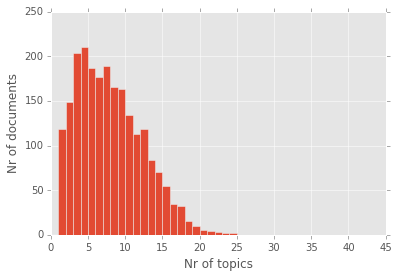

In [7]:
thetas = [model[c] for c in corpus]
plt.hist([len(t) for t in thetas], np.arange(42))
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')

In [8]:
model1 = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=1.)
thetas1 = [model1[c] for c in corpus]

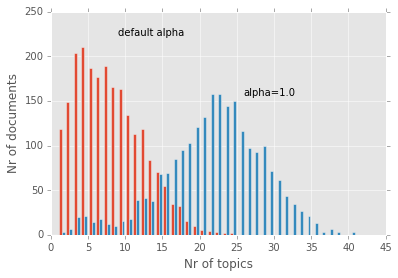

In [9]:
plt.clf()
plt.hist([[len(t) for t in thetas], [len(t) for t in thetas1]], np.arange(42))
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')
plt.text(9,223, r'default alpha')
plt.text(26,156, 'alpha=1.0')

In [ ]:
# 주제를 활용해 워드 클라우드(Word Cloud) 만들기

In [107]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [115]:
# Word Cloud를 만드는 함수
def create_cloud(words):
    wordcloud = WordCloud(font_path='09_data/lda/fonts/malgun.ttf', width=1800, height=1400)
    wordcloud.generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [61]:
# First, we need to sum up the weights across all the documents
weight = np.zeros(model.num_topics)

In [62]:
for doc in corpus:
    for col, val in model[doc]:
        weight[col] += val
        # As a reasonable alternative, we could have used the log of val:
        # weight[col] += np.log(val)
max_topic = weight.argmax()

In [63]:
# 상위 64개의 주제를 꺼내온다.
words = model.show_topic(max_topic, 64)

In [64]:
# 워드 클라우드를 만들 수 있도록 list를 string으로 변경(구분자는 \n으로)
words = '\n'.join(map(lambda w: w[1], words))

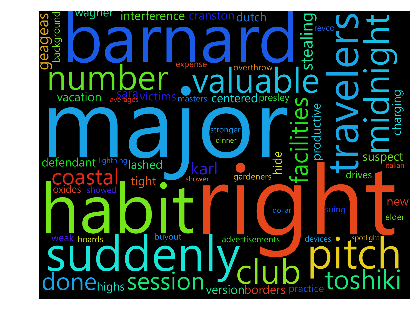

In [116]:
# 워드 클라우드를 생성한다.
create_cloud(words)

In [ ]:
# 주제 공간에서의 유사성 비교

In [74]:
import numpy as np
from scipy.spatial import distance
        
# 주제 매트릭스를 만든다. 가로는 주제의 개수, 세로는 문서의 개수
dense = np.zeros((len(topics), 100), float)
for ti, t in enumerate(topics):
    for tj, v in t:
        dense[ti, tj] = v

# 주제 매트릭스를 활용해 거리 매트릭스를 생성한다. 모든 짝의 거리를 계산한다.
pairwise = distance.squareform(distance.pdist(dense))

# 편법: 대각선에 가장 높은 값을 설정한다.
largest = pairwise.max()
for ti in range(len(topics)):
    pairwise[ti, ti] = largest + 1

# 가장 유사도가 높은 문서를 찾는다.
def closest_to(doc_id):
    return pairwise[doc_id].argmin()

In [77]:
doc_id = closest_to(1)
doc_id

835


In [78]:
import bs4
f = open('09_data/lda/ap/ap.txt')
text = f.read()
docs = text.split('<DOC>')

In [89]:
docs[1]

"\n<DOCNO> AP881218-0003 </DOCNO>\n<TEXT>\n A 16-year-old student at a private Baptist school who allegedly killed one teacher and wounded another before firing into a filled classroom apparently ``just snapped,'' the school's pastor said. ``I don't know how it could have happened,'' said George Sweet, pastor of Atlantic Shores Baptist Church. ``This is a good, Christian school. We pride ourselves on discipline. Our kids are good kids.'' The Atlantic Shores Christian School sophomore was arrested and charged with first-degree murder, attempted murder, malicious assault and related felony charges for the Friday morning shooting. Police would not release the boy's name because he is a juvenile, but neighbors and relatives identified him as Nicholas Elliott. Police said the student was tackled by a teacher and other students when his semiautomatic pistol jammed as he fired on the classroom as the students cowered on the floor crying ``Jesus save us! God save us!'' Friends and family said 

In [90]:
docs[835]

"\n<DOCNO> AP901229-0074 </DOCNO>\n<TEXT>\n Police on Saturday fired on thousands of rioting prisoners demanding freedom, killing at least three and wounding more than 90, prison officials said. At least 33 prison guards were injured, 12 of them hospitalized, after prisoners stormed the prison's main gate with iron rods and sticks, said a police spokesman who could not be identified under briefing rules. About 5,000 convicts and detainees awaiting trial took part in the riot at Dhaka Central Jail, and some tried to scale the walls, a senior police official said on condition of anonymity. Police fired bullets and several tear gas shells. State television said three prisoners were killed. The state BSS news agency said the riot was continuing late Saturday, and some prison wardens were taken hostage. Hundreds of police surrounded the prison. Prisoners later waved blood-stained shirts from the roofs and threw two slips of paper with written messages for journalists standing outside the pr

In [121]:
doc_id = closest_to(5)
doc_id

822

In [122]:
docs[5]

"\n<DOCNO> AP900117-0022 </DOCNO>\n<TEXT>\n Cupid has a new message for lovers this Valentine's Day and volunteers are lining up to spread the word from Loveland. People around the world send their Valentines through the Loveland post office each year to get the special postmark and cachet verse. Ted Thompson, 85, has been coming up with verses since he and his wife, Mabel, started the remailing program in 1947. An estimated 300,000 people will get Thompson's latest Valentine's verse: ``It might just be a song bird, ``Or perhaps some sparkling dew, ``That brings fond recollections, ``And a timeless cupid too.'' Thompson said recently he's not sure where he got the inspiration. ``It takes the whole year for me to get something I'm satisfied with. It's a hard thing for me. Some people are born to write a verse for you, but that's far away from me.'' Since it stamped 300 pieces of mail its first year, more than 7 million Valentines have passed through the program. The mail is hand-stamped

In [123]:
docs[822]

"\n<DOCNO> AP881020-0161 </DOCNO>\n<TEXT>\n Civil servants across the country staged a one-day strike for better pay Thursday, disrupting public services and presenting Premier Michel Rocard with the toughest challenge of his five months in office. There was no way to determine how many of the estimated 5 million civil servants participated. In Paris, subway and bus service was cut by one-half to two-thirds. Many commuters feared the worst and drove into the city, resulting in huge traffic jams. Some highways leading into Paris were backed up as much as 17 miles. Air France canceled 31 flights and major rail lines were running at one-half to two-thirds their usual number. Mail went undelivered and teachers didn't show up for classes in many parts of the country, and many public offices were closed. ``The worst thing that could happen would be that the government continue in its obstinacy,'' said Jean Kaspar, national secretary of the Socialist-run French Democratic Confederation of Lab

In [ ]:
# data 출처 - http://www.cs.princeton.edu/~blei/lda-c/ap.tgz